In [101]:
import numpy as np
import matplotlib.pyplot as plt

points = np.loadtxt("kmeans.txt")
#points = np.genfromtxt("data.csv", delimiter=",")

In [102]:
# set the plot
def plot_points(points):
    plt.title('Points from data.csv')
    plt.xlabel('house-size')
    plt.ylabel('house-price')
    plt.grid()
    for p in points:
        plt.plot(p[0], p[1], 'ro')

def plot_line(m, c, points):
    ax = plt.gca()
    x = points[:,0] #get the x values of the points
    y = [m*i + c for i in x]
    plt.plot(x, y)


In [103]:
def dist(a, b):
    return np.linalg.norm(a-b)

In [104]:
def init_centroids(points, k):
    centroids = []
    for i in range(k):
        centroids.append(points[np.random.randint(0, len(points))])
    return centroids

In [105]:
def plot_centroids(centroids):
    for i in range(len(centroids)):
        plt.plot(centroids[i][0], centroids[i][1], 'ro', color="black")

In [106]:
def mean(a, b):
    return np.array(a+b)/2

In [107]:
def kmeans(points, centroids, k, iters):
    # will hold set of points, for each of 'k' clusters
    # convergence condition
    for it in range(iters):
        for p in range(len(points)):
            point = points[p]
            distance = {} #dictionary, key: cluster, val: euclidean distance
            for clus in range(k):
                ck = centroids[clus]
                distance[clus] = dist(point, ck)
            minDist = min(distance, key=distance.get)
            centroids[minDist] = mean(point, centroids[minDist])
    return centroids

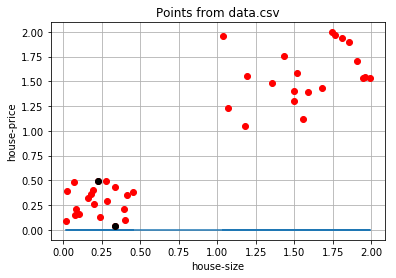

In [108]:
#before clustering
k = 2
plot_points(points)
plot_line(0, 0, points)
centroids = init_centroids(points, k)
plot_centroids(centroids)
plt.show()

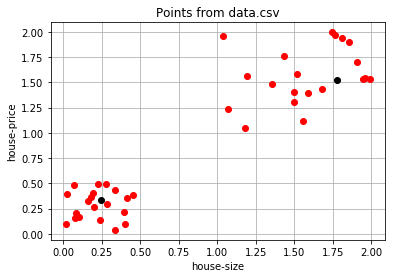

In [109]:
#after clustering
plot_points(points)
centroids = kmeans(points, centroids, k, 10)
plot_centroids(centroids)
plt.show()

In [110]:
print centroids

[array([ 1.77937424,  1.5239826 ]), array([ 0.24324424,  0.32928944])]
